Test for code. Copy paste from ai project last year. Same mechanism just used our folders from track mania

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install Pillow

# importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras import layers, Model

import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

import pandas as pd

import os
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2, EfficientNetV2S

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.preprocessing.image import load_img


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import GlobalAveragePooling2D
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import optimizers

     -------------------------------------- 385.0/385.0 MB 2.4 MB/s eta 0:00:00
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl (3.0 MB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
     -------------------------------------- 126.7/126.7 kB 3.8 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 413.4/413.4 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl (37 kB)
     ---------------------------------------- 4.3/4.3 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.8/7.8 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 217.2/217.2 kB 2.6 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 56.0/56.0 kB ? eta 0:00:00
     ---------------------------------------- 104.1/104.1 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.6/11.6 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 6.3 MB/s eta 0:00:00
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 11.0/11.0 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 44.8/44.8 MB 4.4 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('Liesa/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes=['z', 'q', 'd'])


test_datagen = ImageDataGenerator(rescale = 1./255)

Found 710 images belonging to 3 classes.


In [3]:
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

train_ds = image_dataset_from_directory(
    directory='Liesa/',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

validation_ds = image_dataset_from_directory(
    directory='Liesa/',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

train_ds = train_ds.repeat()
validation_ds = validation_ds.repeat()

Found 1067 files belonging to 3 classes.
Using 854 files for training.
Found 1067 files belonging to 3 classes.
Using 213 files for validation.


In [6]:
# Constants
NUM_CLASSES = 3
IMG_SIZE = 64

# Define the input layer
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Add a resizing layer to resize the images to a consistent shape
x = layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)
# Add a rescaling layer to rescale the pixel values to the [0, 1] range
x = layers.Rescaling(1./255)(x)
# Add some data augmentation layers to apply random transformations during training
x = layers.RandomFlip("horizontal")(x)
# Uncomment the following line if RandomShear is needed
# x = layers.RandomShear(0.2)(x)
x = layers.RandomZoom(0.2)(x)

# Add the convolutional and pooling layers
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

# Flatten the output of the convolutional layers
x = layers.Flatten()(x)  # Or, x = layers.GlobalAveragePooling2D()(x)

# Add the dense layers
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs, name="base_model_test")

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "base_model_test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,475 (3.10 MB)

 Trainable params: 813,475 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_ds,
                    validation_data = validation_ds,
                    steps_per_epoch = 100,
                    validation_steps = 20, # we have a .20 validation split, so we'll use 80% less batches for validation
                    epochs = 20)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 496ms/step - accuracy: 0.3477 - loss: 1.3736 - val_accuracy: 0.3204 - val_loss: 1.1008
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 458ms/step - accuracy: 0.3377 - loss: 1.0984 - val_accuracy: 0.3081 - val_loss: 1.1008
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 457ms/step - accuracy: 0.3820 - loss: 1.0910 - val_accuracy: 0.3377 - val_loss: 1.1069
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.4209 - loss: 1.0787 - val_accuracy: 0.4168 - val_loss: 1.0780
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.4403 - loss: 1.0588 - val_accuracy: 0.4399 - val_loss: 1.0583
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.4674 - loss: 1.0446 - val_accuracy: 0.4448 - val_loss: 1.0534
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 456ms/step - accuracy: 0.4948 - loss: 1.0116 - val_accuracy: 0.4267 - val_loss: 1.0485
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 468ms/step - accuracy: 0.5215 - loss: 0

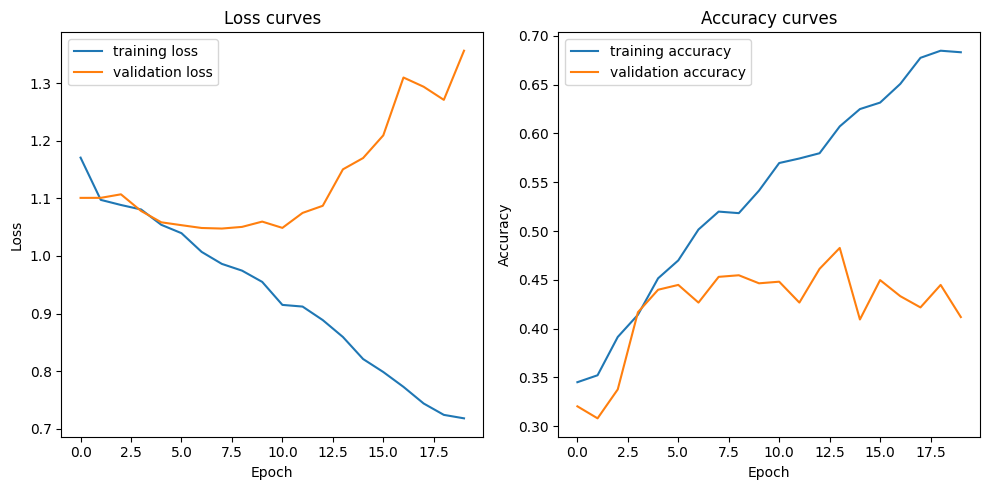

In [8]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [9]:
history = model.fit(train_ds,
                    validation_data = validation_ds,
                    steps_per_epoch = 100,
                    validation_steps = 20, # we have a .20 validation split, so we'll use 80% less batches for validation
                    epochs = 7)

Epoch 1/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.7025 - loss: 0.6738 - val_accuracy: 0.4337 - val_loss: 1.3946
Epoch 2/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 460ms/step - accuracy: 0.7284 - loss: 0.6391 - val_accuracy: 0.4300 - val_loss: 1.4214
Epoch 3/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 462ms/step - accuracy: 0.7660 - loss: 0.5769 - val_accuracy: 0.3740 - val_loss: 1.4853
Epoch 4/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 448ms/step - accuracy: 0.7553 - loss: 0.5855 - val_accuracy: 0.3921 - val_loss: 1.5141
Epoch 5/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.7759 - loss: 0.5419 - val_accuracy: 0.3904 - val_loss: 1.5715
Epoch 6/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 534ms/step - accuracy: 0.7718 - loss: 0.5494 - val_accuracy: 0.3987 - val_loss: 1.6857
Epoch 7/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.7798 - loss: 0.5267 - val_accuracy: 0.4498 - val_loss: 1.5055


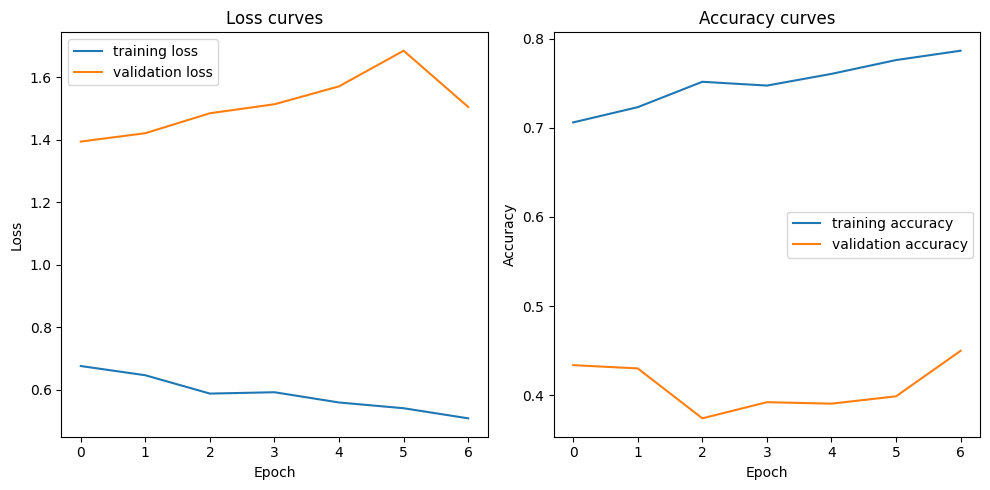

In [10]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()